In [1]:
#Dependencies
import os
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras import layers
from keras import models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


# DATA DIRECTORY

In [2]:
original_dataset_dir = '../input'
base_dir = '../input/skin-cancer-malignant-vs-benign'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_malignant_dir = os.path.join(train_dir, 'malignant')
train_benign_dir = os.path.join(train_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')
test_benign_dir = os.path.join(test_dir, 'benign')


# IMAGE

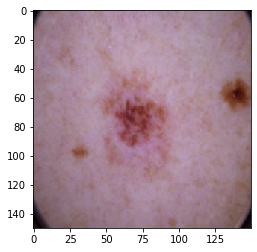

In [3]:

fnames = [os.path.join(train_benign_dir, fname) for fname in os.listdir(train_benign_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
imgplot = plt.imshow(img)
plt.show()

# DATA PRE-PROCESSING

In [4]:
nepoch=15
nbatch=40
tsize=(100,100)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=tsize,color_mode='rgb',
                                                    subset= 'training',batch_size=nbatch,class_mode='binary')

Found 2110 images belonging to 2 classes.


In [7]:
val_generator = train_datagen.flow_from_directory(train_dir,target_size=tsize,color_mode='rgb',
                                                  subset= 'validation',batch_size=nbatch,class_mode='binary')

Found 527 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=tsize,color_mode='rgb',
                                                  class_mode='binary',shuffle=False)

Found 660 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (40, 100, 100, 3)
labels batch shape: (40,)


# MODEL

In [10]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(100,100, 3)))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       7

2022-09-29 17:29:55.112322: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['acc'])

In [12]:
history = model.fit_generator(train_generator,validation_data=val_generator,epochs=nepoch)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-09-29 17:29:57.085469: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
53/53 [==============================] - 40s 728ms/step - loss: 0.7237 - acc: 0.5754 - val_loss: 0.7441 - val_acc: 0.4725
Epoch 2/15
53/53 [==============================] - 24s 452ms/step - loss: 0.5740 - acc: 0.7152 - val_loss: 0.6528 - val_acc: 0.7685
Epoch 3/15
53/53 [==============================] - 23s 439ms/step - loss: 0.5480 - acc: 0.7602 - val_loss: 0.5759 - val_acc: 0.7400
Epoch 4/15
53/53 [==============================] - 24s 451ms/step - loss: 0.4942 - acc: 0.7668 - val_loss: 0.5629 - val_acc: 0.7723
Epoch 5/15
53/53 [==============================] - 23s 442ms/step - loss: 0.4753 - acc: 0.7664 - val_loss: 0.5715 - val_acc: 0.7704
Epoch 6/15
53/53 [==============================] - 24s 457ms/step - loss: 0.4604 - acc: 0.7796 - val_loss: 0.5203 - val_acc: 0.7723
Epoch 7/15
53/53 [==============================] - 24s 453ms/step - loss: 0.4324 - acc: 0.7900 - val_loss: 0.5085 - val_acc: 0.7666
Epoch 8/15
53/53 [==============================] - 24s 449ms/step - 

In [13]:
model.evaluate(test_generator)

21/21 [==============================] - 9s 422ms/step - loss: 0.5911 - acc: 0.7652


[0.5910763144493103, 0.7651515007019043]

In [14]:
Y_pred= model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


# CONFUSION MATRIX

In [15]:
cnf_matrix=confusion_matrix(test_generator.labels, Y_pred.round())

In [16]:
print('Confusion Matrix')
print(cnf_matrix)

Confusion Matrix
[[262  98]
 [ 57 243]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


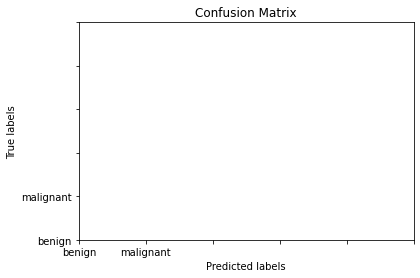

In [23]:

cm=sns.heatmap(cnf_matrix, annot=True)
ax= plt.subplot()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticks(Y_pred) 
ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant']);

# Sensitivity & Precision

In [19]:
TP= cnf_matrix[0][0]
TN=cnf_matrix[1][1]
FP=cnf_matrix[0][1]
FN=cnf_matrix[1][0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 

print('Fasle Negative:',FN)
print('Fasle Positive:',FP)
print('True Positive:',TP)
print('True Negative:',TN)
print('True Positive rate:',TPR)
print('True Negative rate',TNR)

Fasle Negative: 57
Fasle Positive: 98
True Positive: 262
True Negative: 243
True Positive rate: 0.8213166144200627
True Negative rate 0.7126099706744868


# ROC Curve

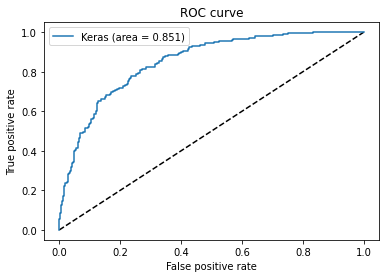

In [20]:

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
##################################################################################################################

# Using data Augumentation

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest',rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest',rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=tsize,color_mode='rgb',subset= 'training',batch_size=nbatch,class_mode='binary')

In [ ]:
val_generator = train_datagen.flow_from_directory(train_dir,target_size=tsize,color_mode='rgb',subset= 'validation',batch_size=nbatch,class_mode='binary')

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=tsize,color_mode='rgb',class_mode='binary',shuffle=False)

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(100,100, 3)))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator,validation_data=val_generator,epochs=nepoch)

In [ ]:
model.evaluate(test_generator)

In [ ]:
Y_pred= model.predict_generator(test_generator)
print('Confusion Matrix')
print(cnf_matrix)

In [ ]:

y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_keras, tpr_keras, label='RF (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
###################################################################################################################

# With input size 256x256 

In [28]:
tsize=(256,256)

In [34]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256,256, 3)))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 125, 125, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 128)      

In [35]:
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator,validation_data=val_generator,epochs=nepoch)

Epoch 1/15
53/53 [==============================] - 168s 3s/step - loss: 1.6449 - acc: 0.5351 - val_loss: 0.6895 - val_acc: 0.5465
Epoch 2/15
53/53 [==============================] - 166s 3s/step - loss: 0.7967 - acc: 0.6014 - val_loss: 0.7207 - val_acc: 0.4573
Epoch 3/15
53/53 [==============================] - 166s 3s/step - loss: 0.6466 - acc: 0.6777 - val_loss: 0.5947 - val_acc: 0.7021
Epoch 4/15
53/53 [==============================] - 166s 3s/step - loss: 0.6123 - acc: 0.6986 - val_loss: 0.6095 - val_acc: 0.7476
Epoch 5/15
53/53 [==============================] - 165s 3s/step - loss: 0.5458 - acc: 0.7294 - val_loss: 0.5417 - val_acc: 0.7438
Epoch 6/15
53/53 [==============================] - 169s 3s/step - loss: 0.5199 - acc: 0.7469 - val_loss: 0.5429 - val_acc: 0.7571
Epoch 7/15
49/53 [==========================>...] - ETA: 12s - loss: 0.4998 - acc: 0.7672

In [ ]:
model.evaluate(test_generator)

In [ ]:
Y_pred= model.predict_generator(test_generator)
print('Confusion Matrix')
print(cnf_matrix)

In [ ]:
y_pred_keras = model.predict(test_generator).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_keras, tpr_keras, label='RF (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()